# 8. 相对强弱市场
*强者越强，弱者越弱*

## 目录
1. 什么是相对强弱？
2. 怎么计算相对强弱？
3. 如何用图形展示相对强弱？
4. 如何用相对强弱来编写策略？

## 什么是相对强弱？
一段时间内某股票和本行业的股票或整个市场的比较，即对该股票市场表现的计量。当变动值低于1.0时，表示该股票的价格波动幅度小于整个市场；若变动值大于1.0，则表示该股票的波动大于整个市场。

## 怎么计算相对强弱？
RS = Stock/Index

MOM_RS = Momentum(RS)

MOM_MOM = Momentum(MOM_RS)

## 如何用图形展示相对强弱？

In [1]:
import pandas as pd
import tushare as ts

stock = ts.get_k_data('600036', start='2016-01-01', end='2017-4-31', ktype='D', autype='qfq')
hs300 = ts.get_hist_data('hs300', start='2016-01-01', end='2017-4-31', ktype='D', )

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
hs300.index = pd.to_datetime(hs300.index, format='%Y-%m-%d')

RS = stock.close/hs300.close
RS = RS.dropna()
print RS.tail()

date
2017-05-08    0.005594
2017-05-09    0.005605
2017-05-10    0.005699
2017-05-11    0.005738
2017-05-12    0.006008
Name: close, dtype: float64


In [3]:
#Momentum_RS
import talib as ta

MOM_RS = ta.ROCR(RS.values, 20)*100
MOM_MOM = ta.ROCR(MOM_RS, 20)*100
data_s = stock.close
data1 = pd.Series(MOM_RS, index=RS.index)
data2 = pd.Series(MOM_MOM, index=RS.index)
data = pd.concat([data_s, RS, data1, data2], axis=1)
data.columns = ['close', 'RS', 'MOM_RS', 'MOM_MOM']
print data.tail()

            close        RS      MOM_RS     MOM_MOM
date                                               
2017-05-08  18.79  0.005594  104.169014  108.494768
2017-05-09  18.79  0.005605  103.888613  107.045956
2017-05-10  19.02  0.005699  105.381850  107.506092
2017-05-11  19.26  0.005738  105.704400  107.161096
2017-05-12  20.34  0.006008  111.607811  114.556197


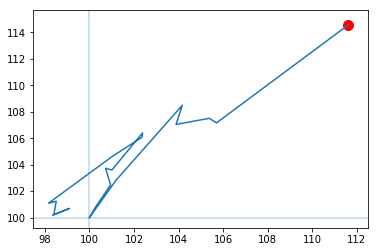

In [4]:
import matplotlib.pyplot as plt


plt.plot(data.MOM_RS.tail(20).values, data.MOM_MOM.tail(20).values)
plt.axhline(100,alpha=0.3)
plt.axvline(100,alpha=0.3)
X=data['MOM_RS'].iloc[-1]
Y=data['MOM_MOM'].iloc[-1]
plt.scatter(X,Y,color='r', s=100)
plt.show()

## 如何用相对强弱来编写策略？
**买入时机：**

第一象限：（MOM_RS>100, MOM_MOM>100）

第四象限：（MOM_RS< 100, MOM_MOM >100）

**卖出时机**

第二象限：（MOM_RS > 100, MOM_MOM < 100）

第三象限：（MOM_RS< 100, MOM_MOM < 100）

close       15.165000
RS           0.004884
MOM_RS     100.166950
MOM_MOM     98.445258
Name: 2016-03-07 00:00:00, dtype: float64


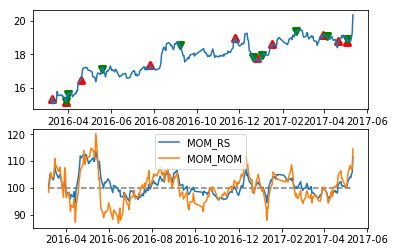

In [10]:
#第一象限买，第二象限卖
buy_time = []
buy_price = []

sell_time = []
sell_price = []

data = data.dropna()
it = data.iterrows()
t0, p0 = next(it)
pos = 0

print p0

for t1, p1 in it:
    if pos==0 and p1.MOM_RS >= 100 and p1.MOM_MOM >= 100 :
        buy_time.append(t1)
        buy_price.append(p1.close)
        pos=1
    elif pos==1 and p1.MOM_MOM < 100 :
        sell_time.append(t1)
        sell_price.append(p1.close)
        pos=0
    t0, p0 = t1, p1


plt.subplot(2,1,1)
plt.plot(data['close'])
plt.scatter(buy_time, buy_price, c='r', marker='^', linewidths=3)
plt.scatter(sell_time, sell_price, c='g', marker='v', linewidths=3)
plt.subplot(2,1,2)
plt.plot(data.MOM_RS, label = 'MOM_RS')
plt.plot(data.MOM_MOM, label = 'MOM_MOM')
plt.hlines(100,data.index[0],data.index[-1] , linestyles='dashed', alpha=0.5)
plt.legend()
plt.show()

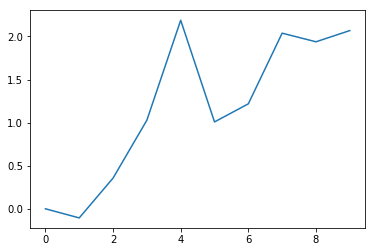

In [13]:
import numpy as np
money = np.array(sell_price) - np.array(buy_price[:-1])
money = list(money)
money.insert(0,0)
money = np.array(money)
capital = money.cumsum()
plt.plot(capital)
plt.show()

## 作业
根据以上代码做出其他象限进场的策略